In [211]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [212]:
data_crime=pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv")

In [213]:
data_crime.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


# EDA

In [214]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


## Data understanding 

Split month//day//year to :
* year
* month
* day

In [215]:
year=data_crime["CrimeDate"].str.extract(r'(\d{4})').rename(columns={0:"year"})
day=data_crime["CrimeDate"].str.extract(r'.(\d{2})').rename(columns={0:"day"})
month=data_crime["CrimeDate"].str.extract(r'(\d{2})').rename(columns={0:"month"})

In [216]:
data_crime.dropna(inplace=True)
data_crime.drop(columns=["CrimeDate"],inplace=True)

In [217]:
date=pd.concat([year,month,day],axis=1)
data_crime=pd.concat([date,data_crime],axis=1)

# Miss value

In [218]:
data_crime.isnull().sum()

year                    0
month                   0
day                     0
CrimeTime          186586
CrimeCode          186586
Location           186586
Description        186586
Inside/Outside     186586
Weapon             186586
Post               186586
District           186586
Neighborhood       186586
Longitude          186586
Latitude           186586
Location 1         186586
Premise            186586
Total Incidents    186586
dtype: int64

In [219]:
data_crime.dropna(inplace=True)

# Describe statistic


In [220]:
data_crime.describe()

,Post,Longitude,Latitude,Total Incidents
count,89943.000000,89943.000000,89943.000000,89943.0
mean,512.234815,-76.618072,39.305959,1.0
std,261.351552,0.041477,0.028629,0.0
min,111.000000,-76.711270,39.200410,1.0
25%,311.000000,-76.648880,39.289285,1.0
50%,511.000000,-76.614450,39.302770,1.0
75%,732.000000,-76.588630,39.323680,1.0
max,943.000000,-76.529770,39.371970,1.0


In [221]:
data_crime.describe(include=['O'])

,year,month,day,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,District,Neighborhood,Location 1,Premise
count,89943,89943,89943,89943,89943,89943,89943,89943,89943,89943,89943,89943,89943
unique,6,12,31,2752,34,16784,9,4,4,9,277,37455,114
top,2016,05,01,16:00:00,4E,1500 RUSSELL ST,COMMON ASSAULT,I,HANDS,NORTHEASTERN,Downtown,"(39.2952900000, -76.5912900000)",STREET
freq,17087,9051,3310,942,43093,223,43093,46110,46395,13088,3127,199,33546


# bivariate Analysis

## categorical (year) - categorical (description/crime)

### How to see most Crime in 2017 

In [222]:
most_crime_2017=data_crime[data_crime["year"]=="2017"]

In [223]:
most_crime_2017.groupby('year')["Description"].value_counts()

year  Description         
2017  COMMON ASSAULT          4642
      AGG. ASSAULT            3021
      ROBBERY - STREET        1306
      SHOOTING                 465
      ROBBERY - COMMERCIAL     373
      HOMICIDE                 232
      ROBBERY - CARJACKING     211
      RAPE                     151
      ROBBERY - RESIDENCE      137
Name: Description, dtype: int64

In [224]:
style_most_crime= pd.DataFrame(most_crime_2017['Description'].value_counts()).rename({"Description":"Total crime"}, axis = 1).rename_axis("Description").head(10).reset_index()

In [225]:
px.bar(style_most_crime,x="Description",y="Total crime",color="Description")

In [226]:
style_most_crime

,Description,Total crime
0,COMMON ASSAULT,4642
1,AGG. ASSAULT,3021
2,ROBBERY - STREET,1306
3,SHOOTING,465
4,ROBBERY - COMMERCIAL,373
5,HOMICIDE,232
6,ROBBERY - CARJACKING,211
7,RAPE,151
8,ROBBERY - RESIDENCE,137


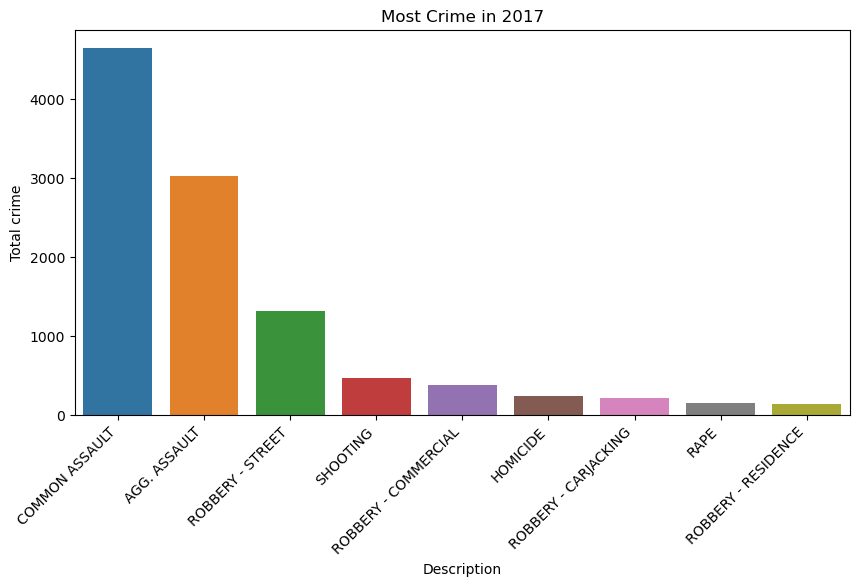

In [227]:
plt.figure(figsize=(10,5))
sns.barplot(data=style_most_crime,x="Description",y="Total crime")
plt.xticks(rotation=45, ha='right')
plt.title("Most Crime in 2017")
plt.show()

In [228]:
data_crime.head()

,year,month,day,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,2017,09,02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1.0
2,2017,09,02,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1.0
3,2017,09,02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1.0
4,2017,09,02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1.0
6,2017,09,02,21:15:00,1F,3400 HARMONY CT,HOMICIDE,Outside,FIREARM,232.0,SOUTHEASTERN,Canton,-76.56827,39.28202,"(39.2820200000, -76.5682700000)",Street,1.0


In [229]:
data_crime["year"].unique()

array(['2017', '2016', '2015', '2014', '2013', '2012'], dtype=object)

### How to see crime by month in 2017

In [230]:
style_crime_by_month_in_2017=pd.DataFrame(most_crime_2017[["month","Description","Total Incidents"]].value_counts()).reset_index().rename(columns={0:"Total crime"})

In [231]:
style_crime_by_month_in_2017.groupby(["month","Description"])["Total Incidents"].sum()

month  Description         
01     AGG. ASSAULT            1.0
       COMMON ASSAULT          1.0
       HOMICIDE                1.0
       RAPE                    1.0
       ROBBERY - CARJACKING    1.0
                              ... 
09     ROBBERY - CARJACKING    1.0
       ROBBERY - COMMERCIAL    1.0
       ROBBERY - RESIDENCE     1.0
       ROBBERY - STREET        1.0
       SHOOTING                1.0
Name: Total Incidents, Length: 80, dtype: float64

In [232]:
most_crime_2017.groupby(['month'])["Description"].value_counts()

month  Description         
01     COMMON ASSAULT          276
       AGG. ASSAULT            214
       ROBBERY - STREET        106
       SHOOTING                 68
       HOMICIDE                 32
                              ... 
09     SHOOTING                  4
       HOMICIDE                  2
       ROBBERY - COMMERCIAL      2
       ROBBERY - CARJACKING      1
       ROBBERY - RESIDENCE       1
Name: Description, Length: 80, dtype: int64

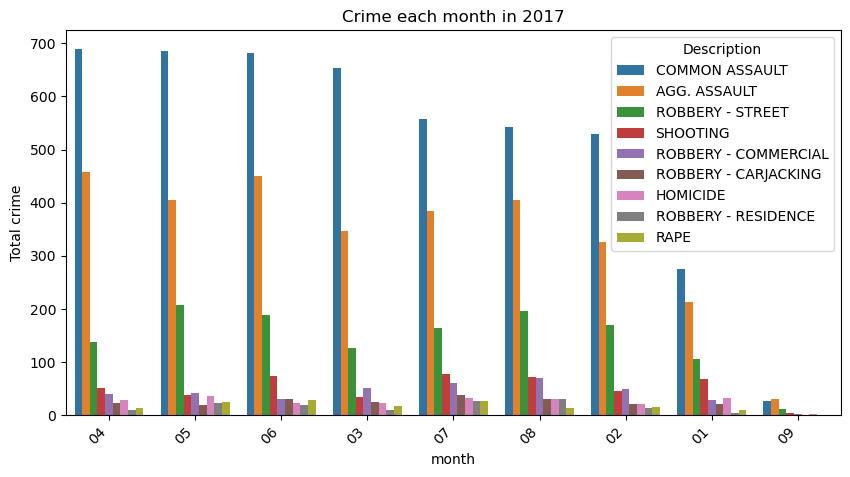

In [233]:
plt.figure(figsize=(10,5))
sns.barplot(data=style_crime_by_month_in_2017,x="month",y="Total crime",hue="Description")
plt.xticks(rotation=45, ha='right')
plt.title("Crime each month in 2017")
plt.show()

make function paradigm programming

In [235]:
def crimeIndicent_in_year(year):
    most_crime_each_year=data_crime[data_crime["year"]==year]
    style_most_crime=pd.DataFrame(most_crime_each_year[["year","month",'Description',"Total Incidents"]].value_counts()).reset_index().rename(columns={0:"Total crime"}).sort_values(by="Total crime",ascending=False)
    plt.figure(figsize=(10,5))
    ax= sns.barplot(data=style_most_crime,x="month",y="Total crime",hue="Description")
    # for i in ax.containers:
    #     ax.bar_label(i,)
        
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Crime each  month  in {year}")
    plt.show()
           

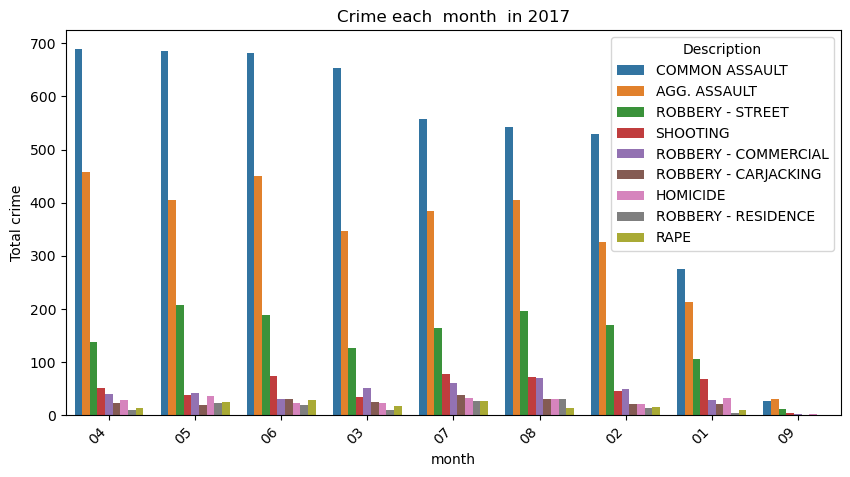

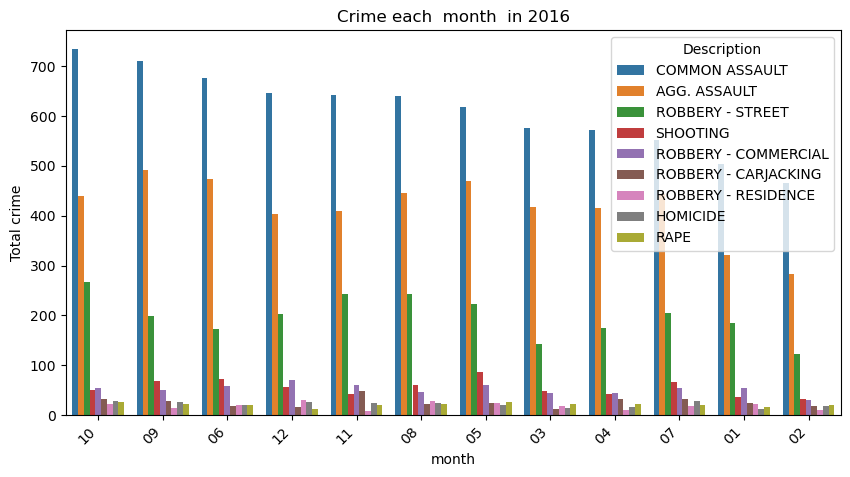

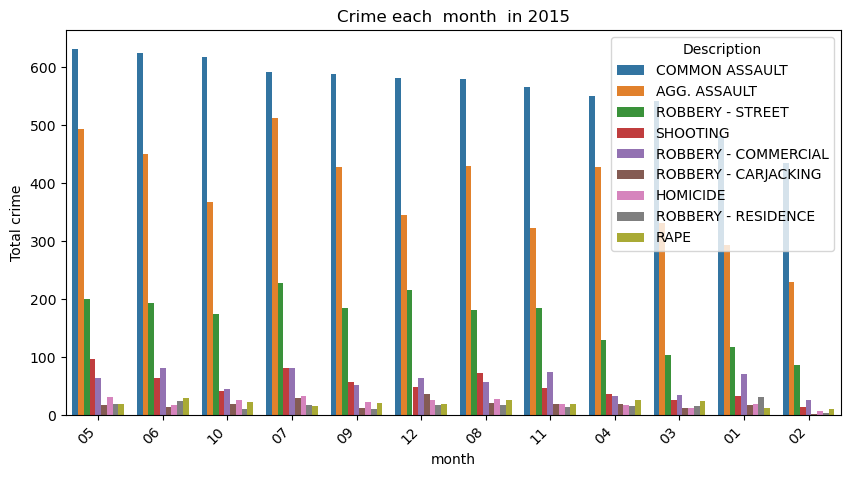

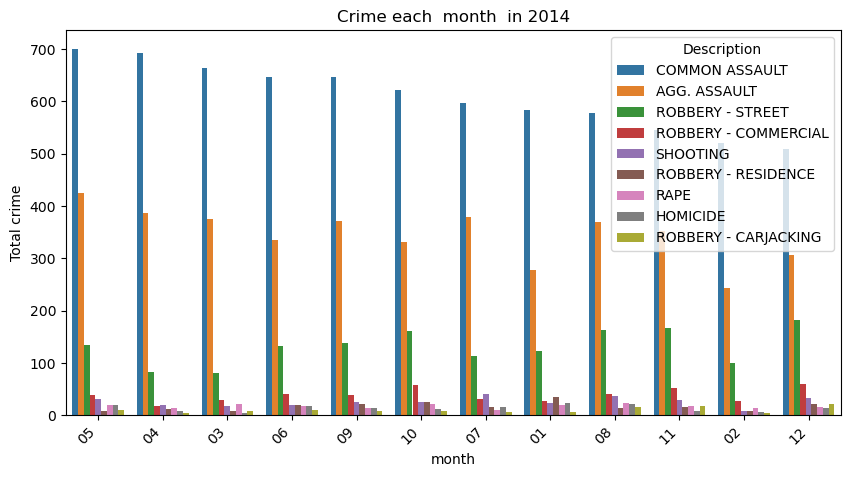

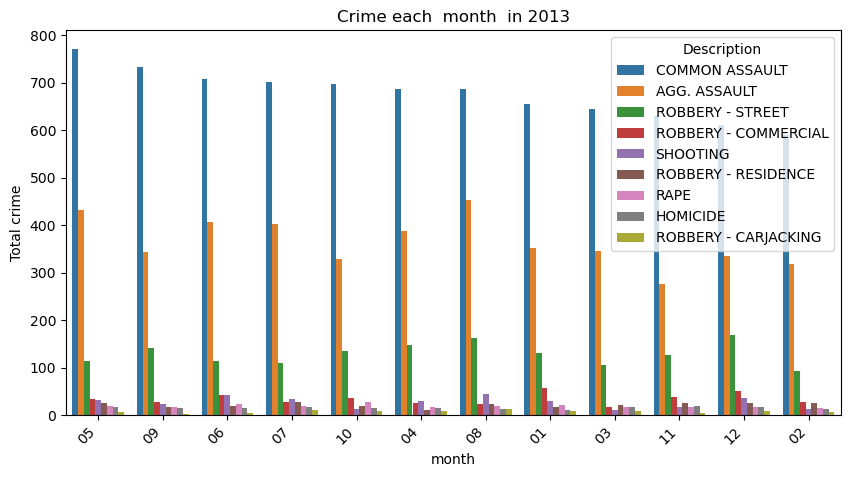

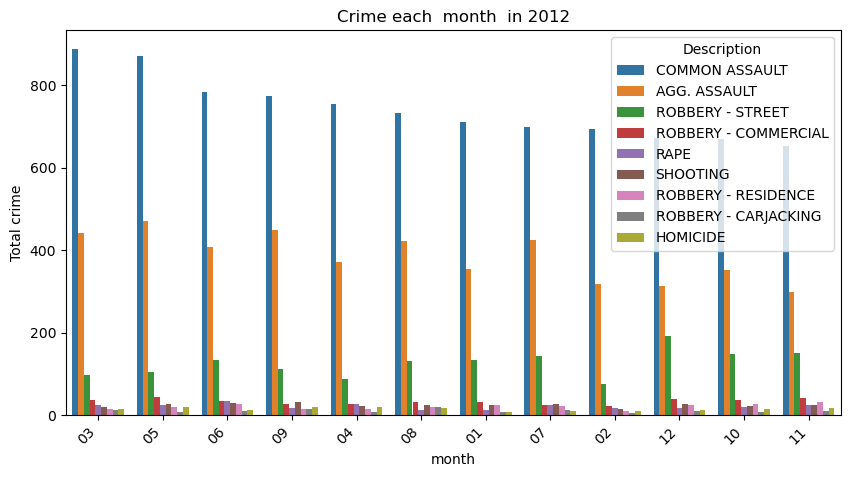

In [236]:
for year in data_crime["year"].unique():
    crimeIndicent_in_year(year)

In [237]:
def crimeIndicent_in_monthByYear(year):
    most_crime_each_year=data_crime[data_crime["year"]==year]
    style_most_crime=pd.DataFrame(most_crime_each_year[["year","month",'Description',"Total Incidents"]].value_counts()).reset_index().rename(columns={0:"Total crime"}).sort_values(by="Total crime",ascending=False)
    for month in style_most_crime["month"].unique():
            data_year=style_most_crime[style_most_crime["month"]==month]
            plt.figure(figsize=(10,5))
            ax= sns.barplot(data=data_year,x="Description",y="Total crime",hue="Description")
            for i in ax.containers:
                 ax.bar_label(i,)
                 plt.xticks(rotation=45, ha='right')
            plt.title(f"Crime each  month {month} in {year}")
            plt.show()
           

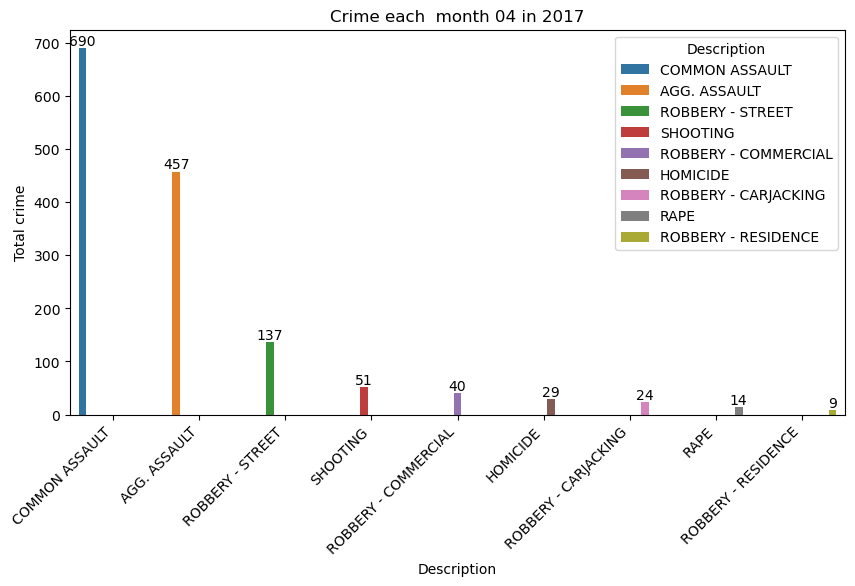

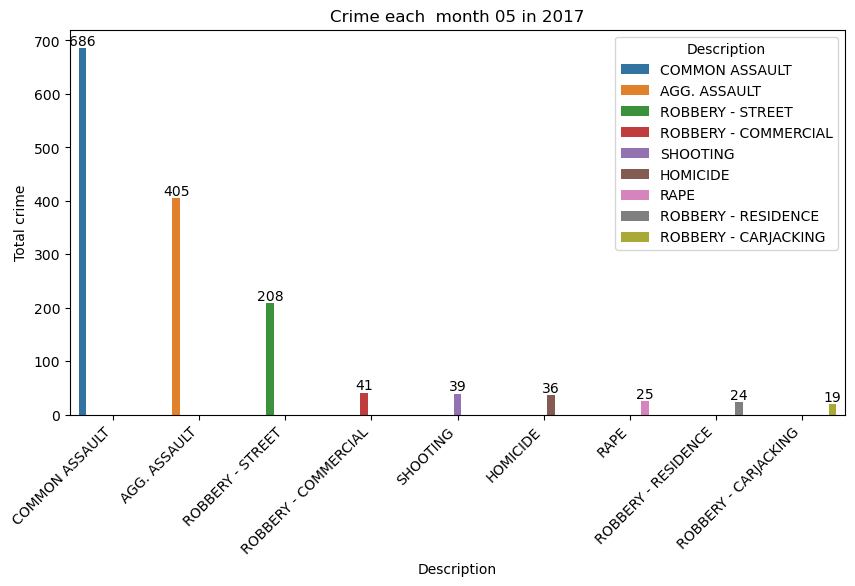

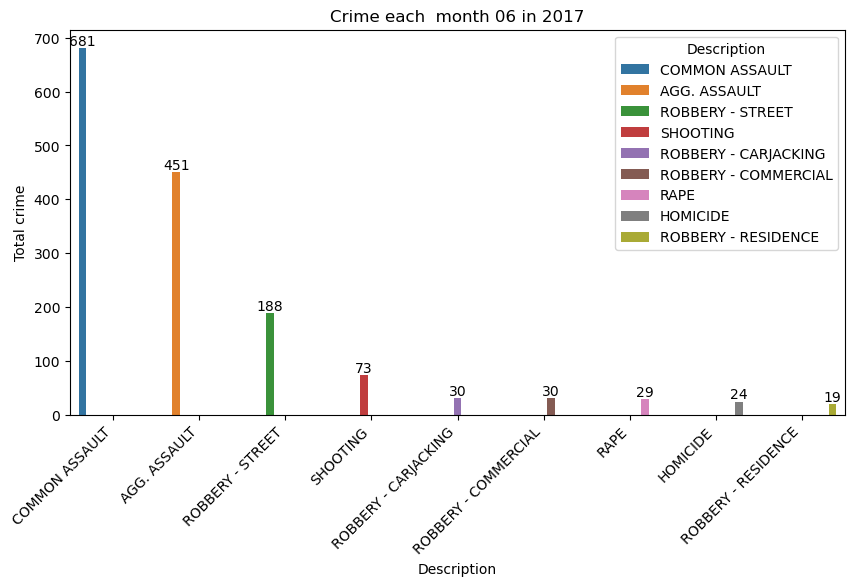

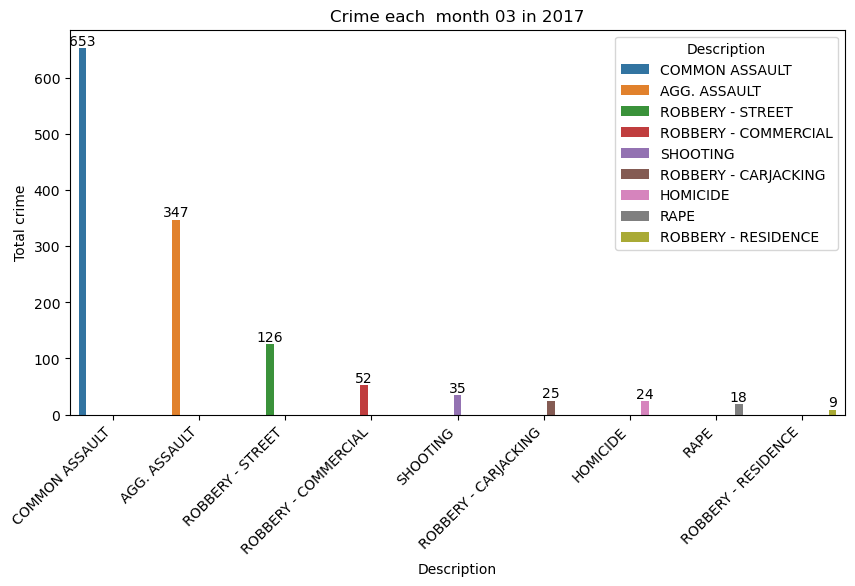

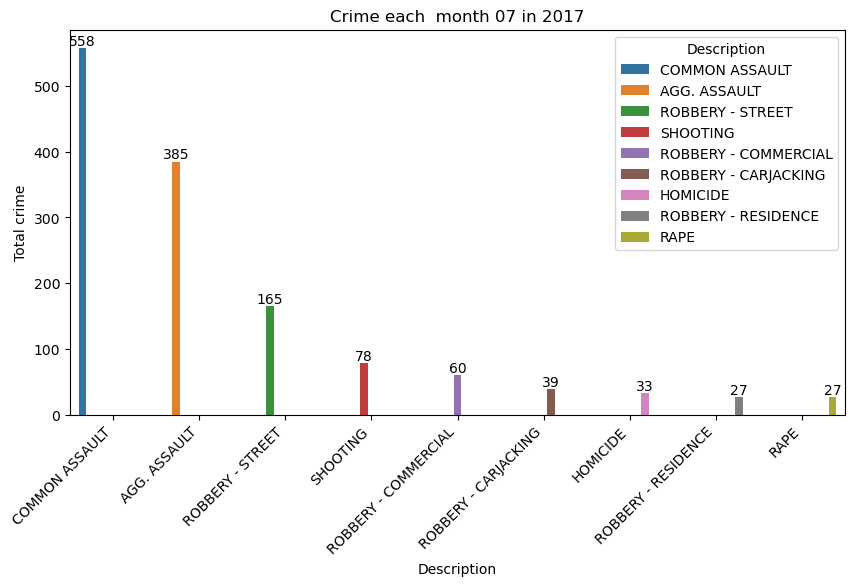

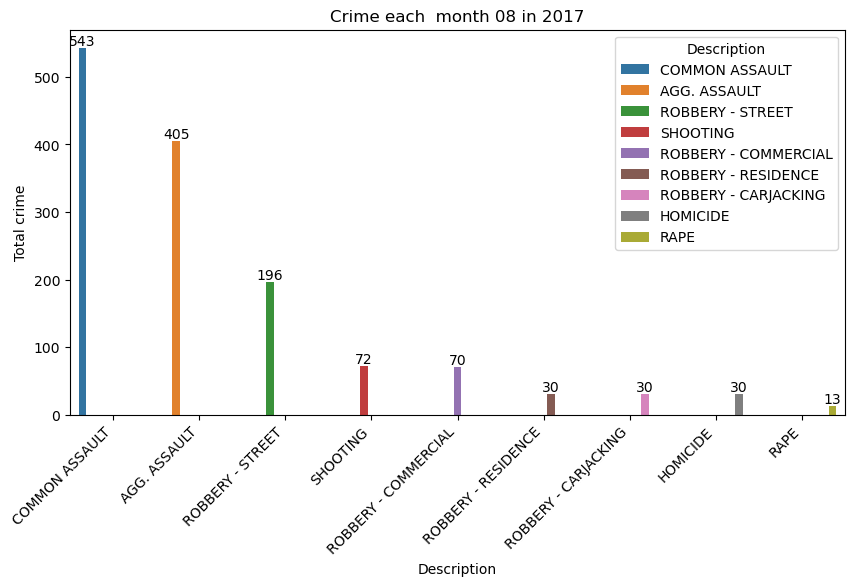

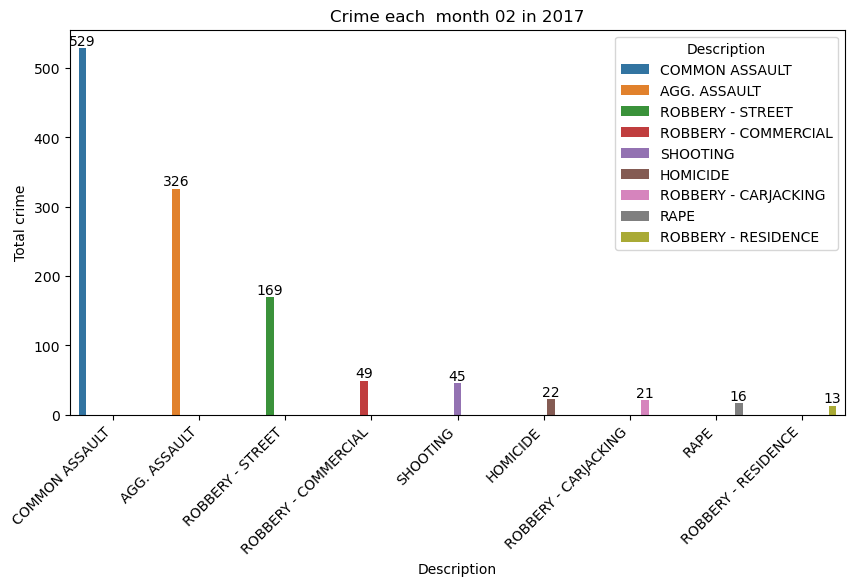

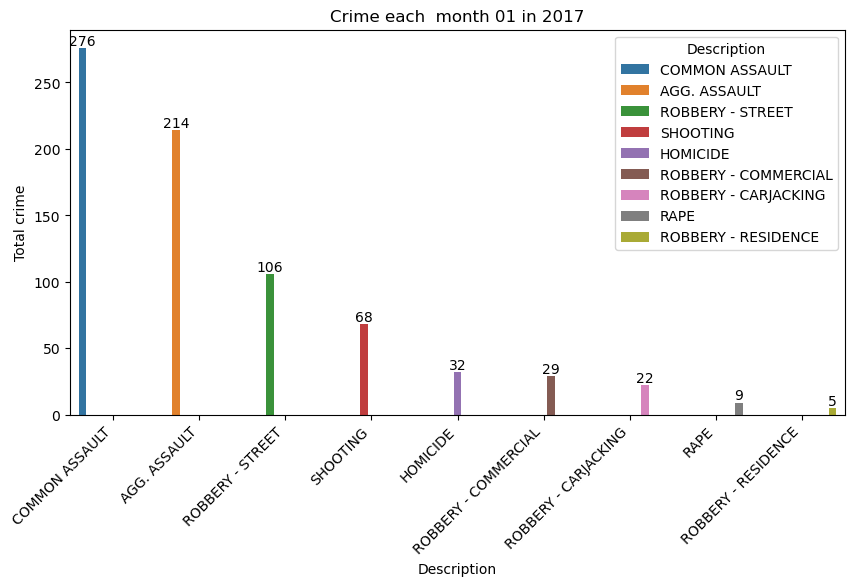

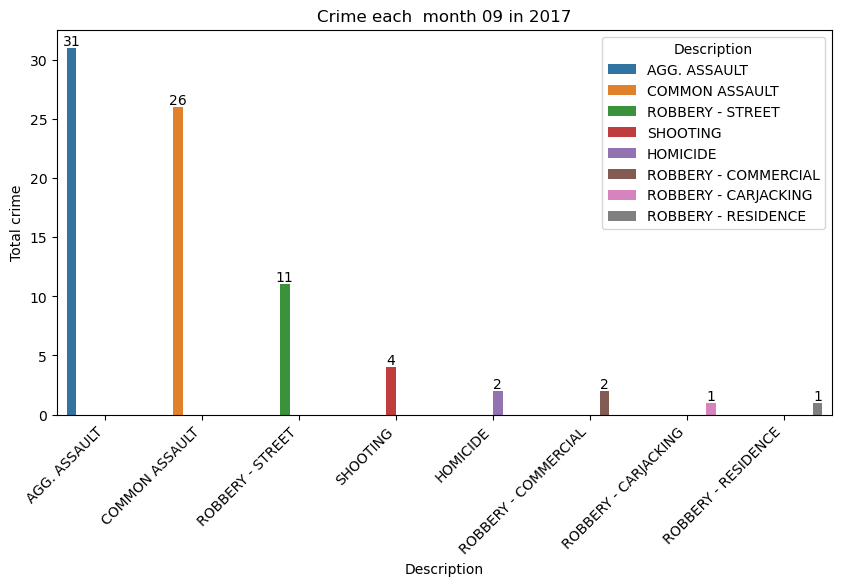

In [238]:
crimeIndicent_in_monthByYear("2017")

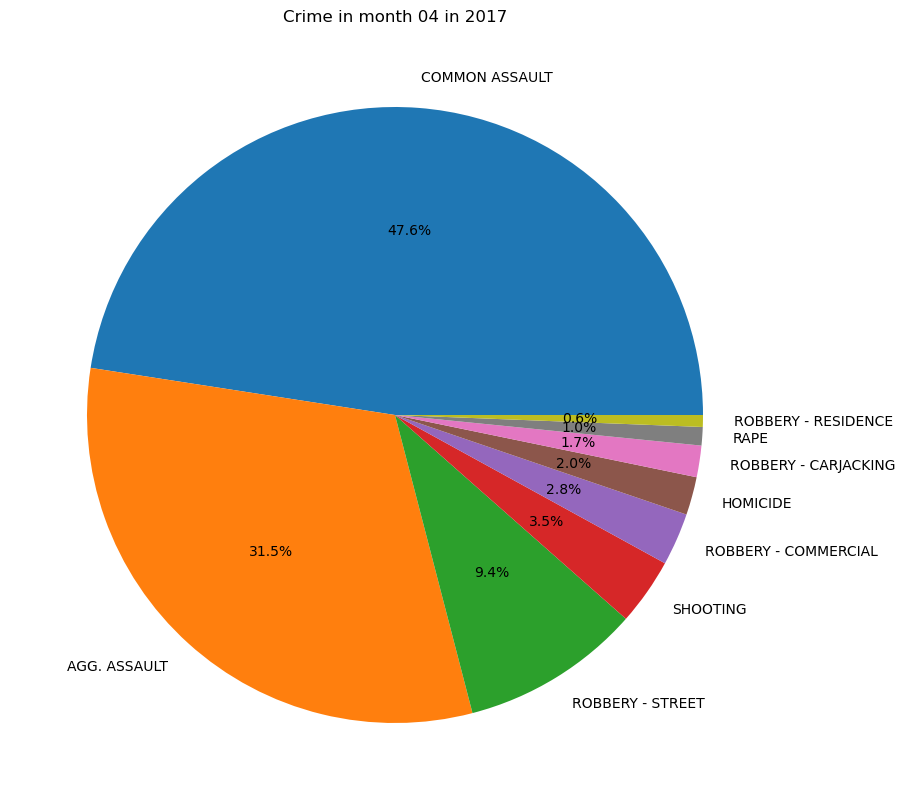

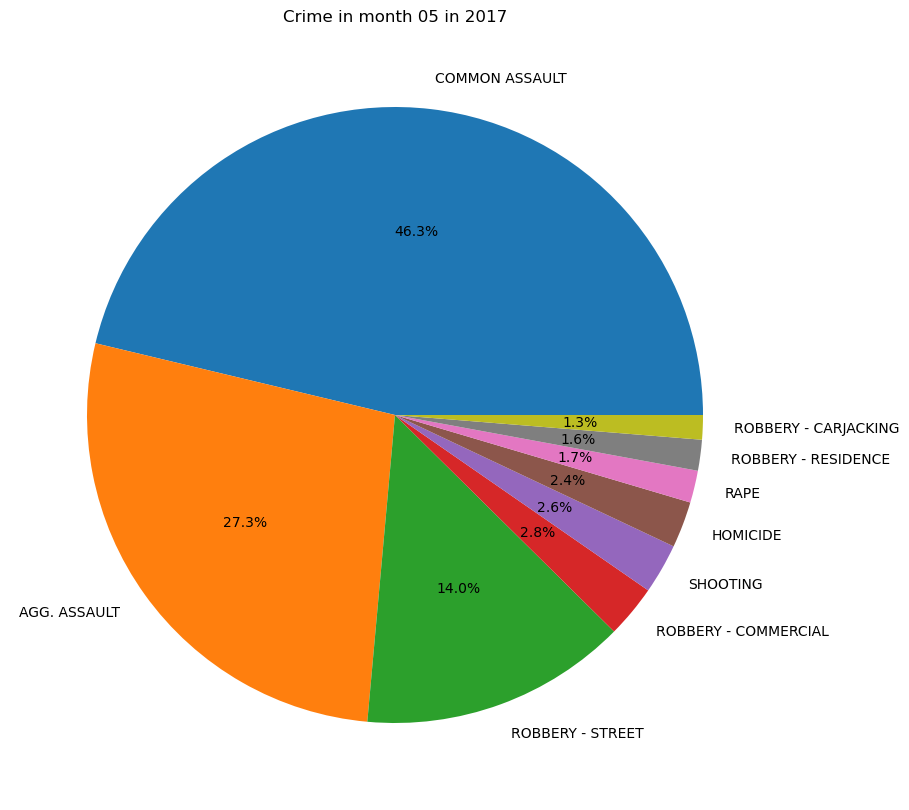

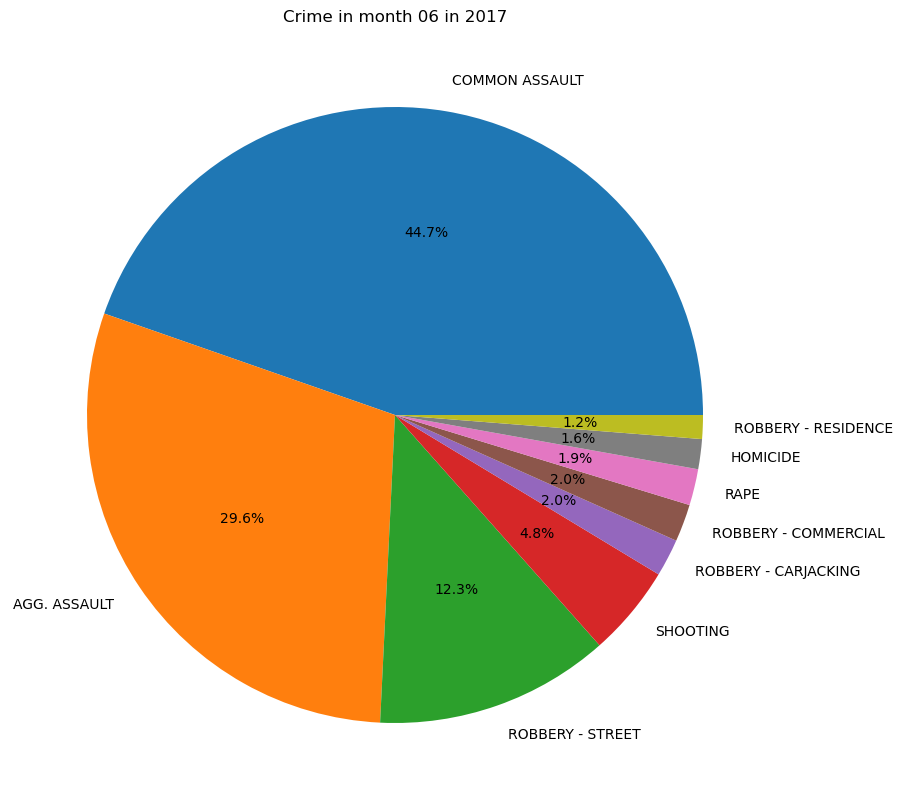

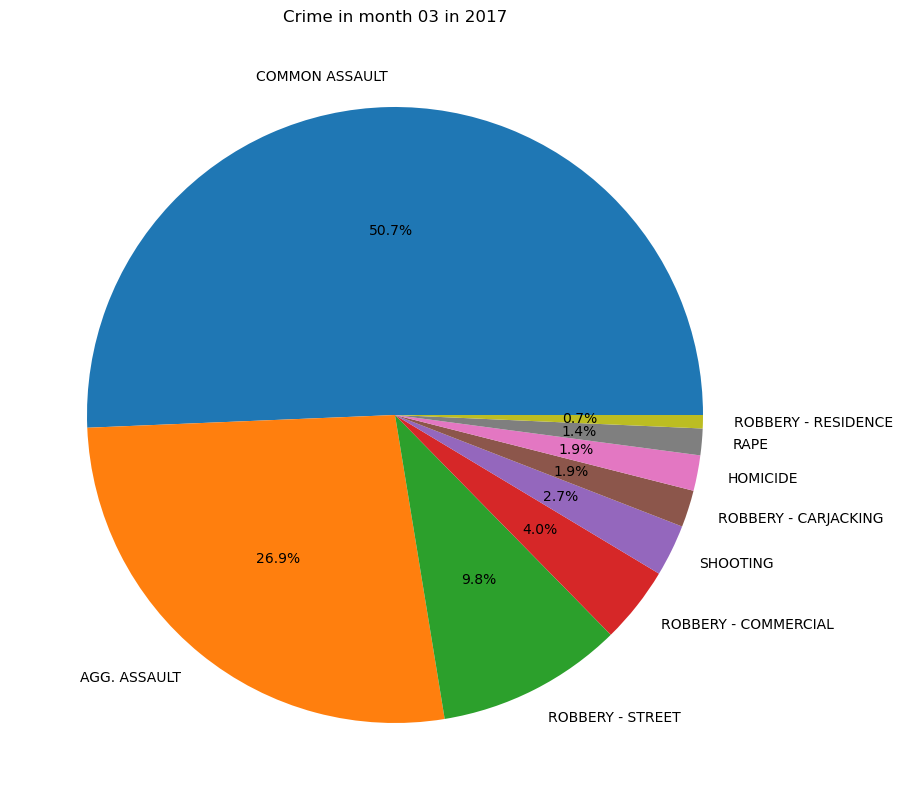

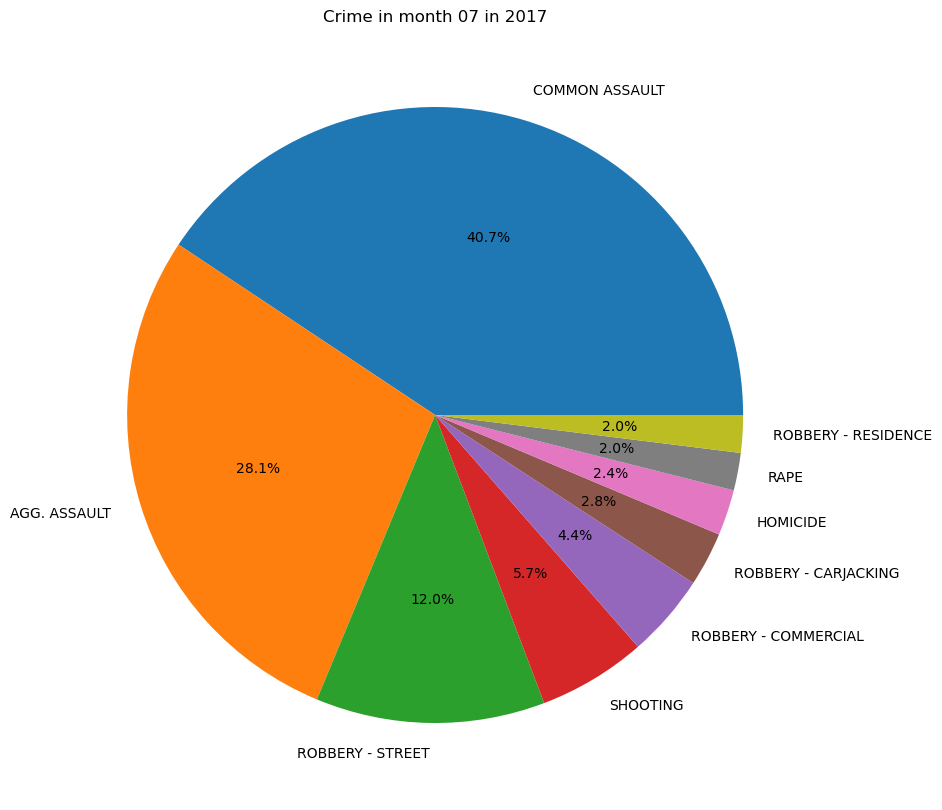

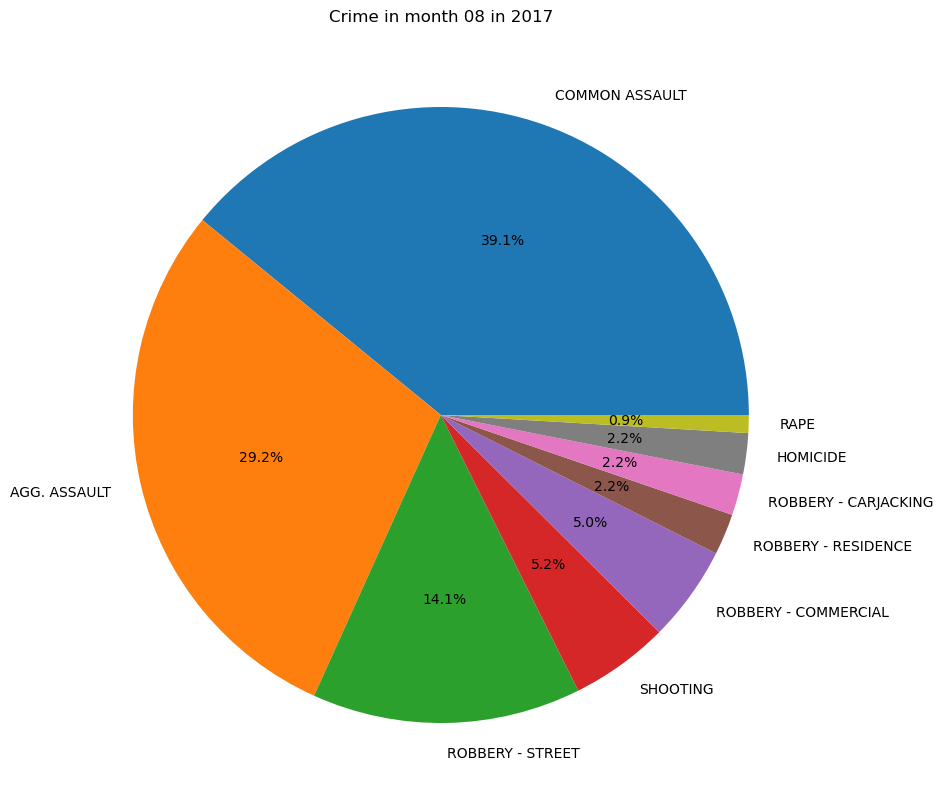

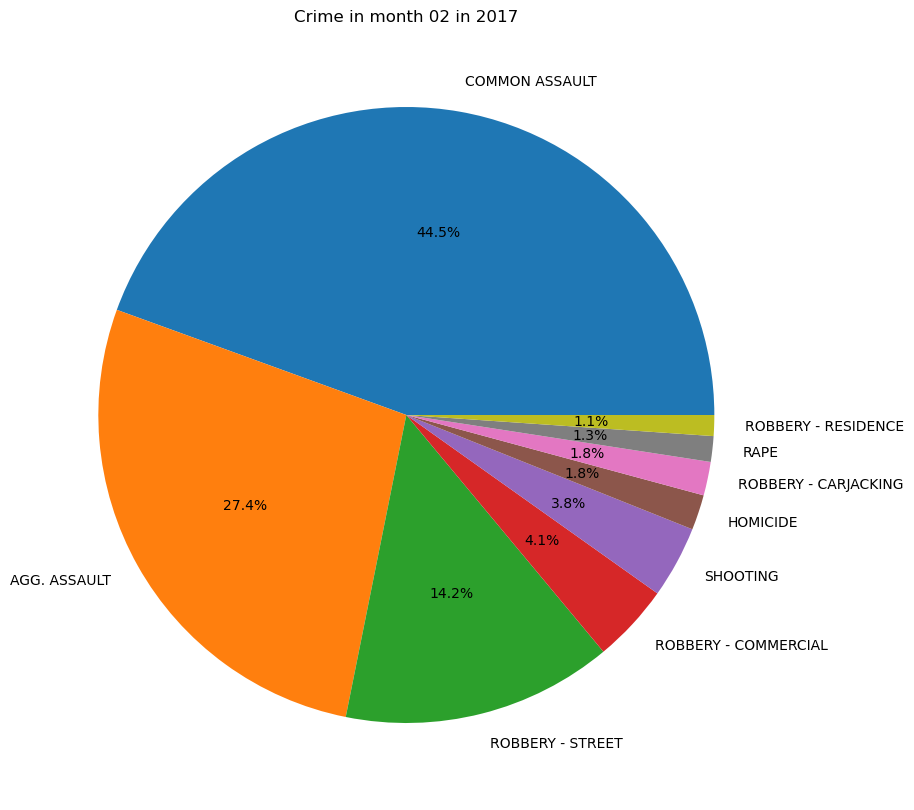

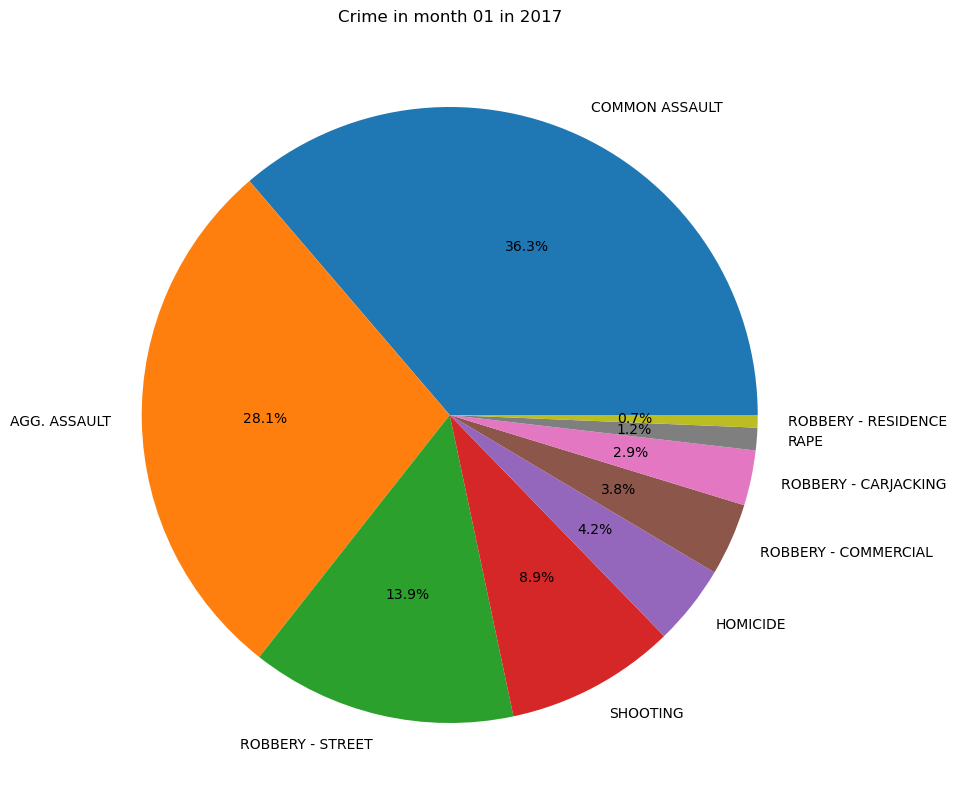

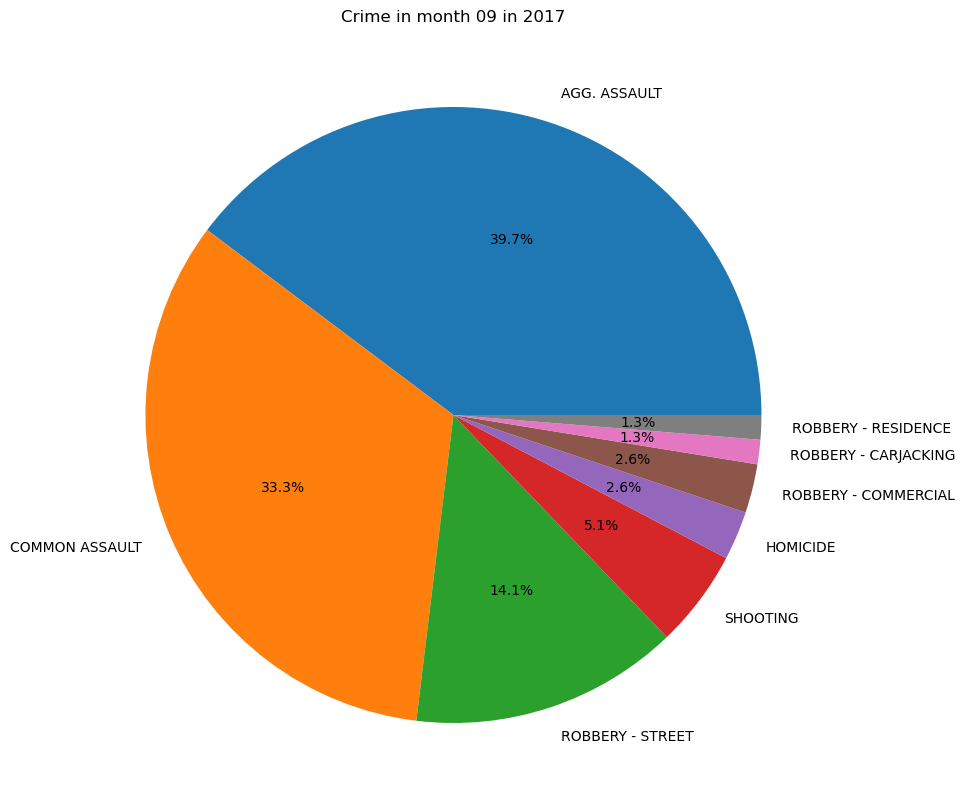

In [239]:
for month in style_crime_by_month_in_2017["month"].unique():
    data_2017=style_crime_by_month_in_2017[style_crime_by_month_in_2017["month"]==month]
    explode=np.zeros(len(data_2017["Description"].unique()),dtype=int)
    plt.figure(figsize=(10,10))
    plt.pie(data= data_2017,x="Total crime",labels="Description",autopct='%1.1f%%',explode=explode)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Crime in month {month} in 2017")
    plt.show()